#### Problem Statement : Classify the incoming data for Kyphosis occurence.

**CART - Classification and Regression Trees**

http://www.stat.umn.edu/RegGraph/data/Kyphosis.lsp

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Import Dataset

- Col 0 = Age = months
- Col 1 = Start = starting vertebrae
- Col 2 = Num = number of vertebrae
- Col 3 = Kyphosis = 1 if present, 0 if absent

In [2]:
df = pd.read_csv('dataset/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


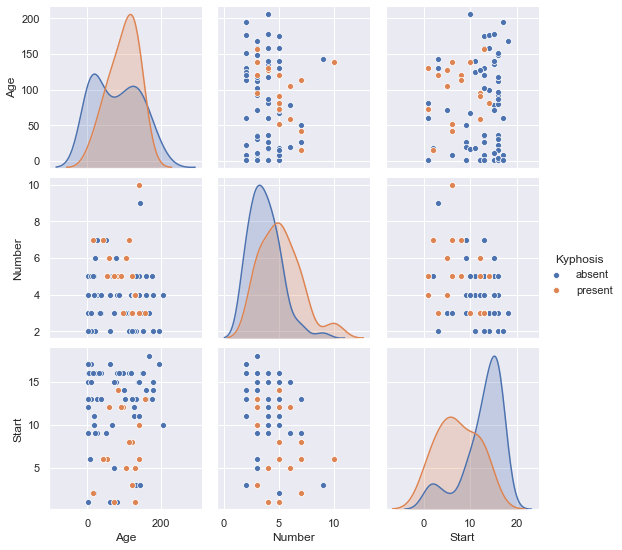

In [7]:
sns.pairplot(df,hue='Kyphosis');

#### Train Test Split

In [22]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape

(64, 3)

In [24]:
X_test.shape

(17, 3)

#### Train using a decision tree classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=4)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

#### Prediction

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred_train = dtree.predict(X_train)

print(f'Accuracy Score :\n{accuracy_score(y_train,y_pred_train)}')
print(f'\n\nConfusion Matrix :\n{confusion_matrix(y_train,y_pred_train)}')
print(f'\n\nClassification Report :\n{classification_report(y_train,y_pred_train)}')

Accuracy Score :
0.9375


Confusion Matrix :
[[47  3]
 [ 1 13]]


Classification Report :
              precision    recall  f1-score   support

      absent       0.98      0.94      0.96        50
     present       0.81      0.93      0.87        14

    accuracy                           0.94        64
   macro avg       0.90      0.93      0.91        64
weighted avg       0.94      0.94      0.94        64



In [32]:
y_pred_test = dtree.predict(X_test)

print(f'Accuracy Score :\n{accuracy_score(y_test,y_pred_test)}')
print(f'\n\nConfusion Matrix :\n{confusion_matrix(y_test,y_pred_test)}')
print(f'\n\nClassification Report :\n{classification_report(y_test,y_pred_test)}')

Accuracy Score :
0.7647058823529411


Confusion Matrix :
[[12  2]
 [ 2  1]]


Classification Report :
              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        14
     present       0.33      0.33      0.33         3

    accuracy                           0.76        17
   macro avg       0.60      0.60      0.60        17
weighted avg       0.76      0.76      0.76        17



#### Visualize the decision tree

In [33]:
X_train.shape

(64, 3)

In [36]:
import sklearn
print(sklearn.__version__)

0.23.2


/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_export.py:183: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 0.25.
  warnings.warn(("'rotate' has no effect and is deprecated in 0.23. "


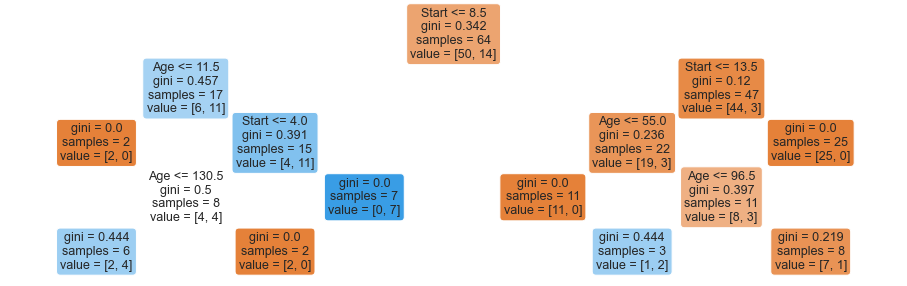

In [34]:
from sklearn.tree import plot_tree

features = list(df.columns[1:])

plt.figure(figsize=(16,5))

s = plot_tree(dtree,
              filled=True,
              rounded=True,
              feature_names=features,
              rotate=True)

1. Attribute Selection Measures
2. Hyperparameter tuning
3. Ensembling of decision trees
    * Random Forest
    * Adaboost
    * XGBoost
    
4. Handling of imbalanced datasets (brief)
    * Smote
    * and other techniques

* Generally, decision tree is used in conjunction with other decision trees as part of an ensemble like Random forest, or Boosting / bagging algos.

# Great Job !